# CSHS Inequality

This tutorial shows how to run CSHS version of Bell's inequality experiment in Braket on local simulator and a QPU.   

## References 

[1]  Bell, J. S. On the Einstein Podolsky Rosen Paradox. Physics Physique Fizika 1, no. 3 (November 1, 1964): 195–200. https://doi.org/10.1103/PhysicsPhysiqueFizika.1.195. 

[2] Greenberger, Daniel M., Michael A. Horne, Abner Shimony, and Anton Zeilinger (1990). Bell’s Theorem without Inequalities. American Journal of Physics 58, no. 12: 1131–43. https://doi.org/10.1119/1.16243. 

[3] John F. Clauser, Michael A. Horne, Abner Shimony, and Richard A. Holt. Proposed Experiment to Test Local Hidden-Variable Theories. Phys. Rev. Lett. 23, 880 – Published 13 October 1969; Erratum Phys. Rev. Lett. 24, 549 (1970) https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.23.880

[4] The Nobel Committee for Physics, Scientifc Background on the Nobel Prize in Physics 2022, https://www.nobelprize.org/uploads/2022/10/advanced-physicsprize2022.pdf

[5] John Preskill, Quantum Information and Computation, Chapter 4, Page 18, http://theory.caltech.edu/~preskill/ph229/notes/chap4_01.pdf

# Run on a local simulator

In [1]:
import numpy as np
from braket.devices import LocalSimulator
from braket.tracking import Tracker

from braket.experimental.algorithms.cshs_inequality import (
    get_cshs_results,
    submit_cshs_tasks
)

tracker = Tracker().start()  # to keep track of Braket costs

CSHS Inequality experiment consists of four circuits acting on two qubits each. The four circuits are grouped together in the `submit_cshs_tasks` function below. To run on a local noise-free simulator, we can call this function. This function takes take the theta angle values as parameters.

First we run on simulator to see the angles providing maximum violations.

In [2]:
local_simulator = LocalSimulator()
n = 100
tv = np.linspace(0,2*np.pi,n)
cshs_inequality_lhs_max=0
cshs_inequality_lhs_max_theta=0
CHSHValArr = []

for t in tv:
    print("t:",t)
    local_tasks = submit_cshs_tasks(local_simulator,a=t,a_=t,b=0,b_=0)
    #To gether the results of CSHS's inequality test, 
    #we call the `get_cshs_results` of the tasks from above. 
    cshs_value,cshs_inequality_lhs,results, E_ab, E_ab_,E_a_b,E_a_b_ = \
    get_cshs_results(local_tasks)
    if cshs_inequality_lhs>cshs_inequality_lhs_max:
        cshs_inequality_lhs_max=abs(cshs_inequality_lhs)
        cshs_inequality_lhs_max_theta=t
    CHSHValArr.append(cshs_value)
    
print("Max cshs_inequality:",cshs_inequality_lhs_max,
      "Corresponding theta:",cshs_inequality_lhs_max_theta)

t: 0.0
a: 0.0
a_: 0.0
b: 0
b_: 0
circ_ab
: T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|
circ_ab_
: T  : |0|1|2|
            
q0 : -H-C---
        |   
q1 : ---X-H-

T  : |0|1|2|
circ_a_b
: T  : |0|1|2|
            
q0 : -H-C-H-
        |   
q1 : ---X---

T  : |0|1|2|
circ_a_b_
: T  : |0|1|2|
            
q0 : -H-C-H-
        |   
q1 : ---X-H-

T  : |0|1|2|
measurement_probabilities: [{'11': 0.506, '00': 0.494}, {'01': 0.242, '11': 0.236, '10': 0.254, '00': 0.268}, {'10': 0.248, '00': 0.253, '11': 0.242, '01': 0.257}, {'00': 0.483, '11': 0.517}]
prob_same: [1.0, 0.504, 0.495, 1.0]
prob_different: [0, 0.496, 0.505, 0]
cshs_value: 1.982
E(a,b) = 1.0,E(a,b') = 0.008000000000000007, E(a',b) = -0.010000000000000009, E(a',b') = 1.0
Bell's' inequality: 1.982 ≤ 2
CSHS inequality is violated!
Notice that the quantity is not exactly 2.82 as predicted by theory.This is may be due to less number shots or the effects of noise on the QPU.
t: 0.06346651825433926
a: 0.063466518254

measurement_probabilities: [{'11': 0.447, '00': 0.48, '10': 0.044, '01': 0.029}, {'01': 0.367, '10': 0.386, '11': 0.124, '00': 0.123}, {'11': 0.381, '00': 0.368, '01': 0.126, '10': 0.125}, {'11': 0.475, '00': 0.446, '01': 0.039, '10': 0.04}]
prob_same: [0.927, 0.247, 0.749, 0.921]
prob_different: [0.073, 0.753, 0.251, 0.079]
cshs_value: 2.7
E(a,b) = 0.8540000000000001,E(a,b') = -0.506, E(a',b) = 0.498, E(a',b') = 0.8420000000000001
Bell's' inequality: 2.7 ≤ 2
CSHS inequality is violated!
Notice that the quantity is not exactly 2.82 as predicted by theory.This is may be due to less number shots or the effects of noise on the QPU.
t: 0.5711986642890533
a: 0.5711986642890533
a_: 0.5711986642890533
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(0.57)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(0.57)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1| 

b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(1.21)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(1.21)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(1.21)-H-
        |            
q1 : ---X------------

T  : |0|1|   2    |3|
circ_a_b_
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(1.21)-H-
        |            
q1 : ---X-H----------

T  : |0|1|   2    |3|
measurement_probabilities: [{'11': 0.329, '00': 0.336, '01': 0.179, '10': 0.156}, {'01': 0.471, '10': 0.493, '00': 0.016, '11': 0.02}, {'00': 0.499, '11': 0.472, '10': 0.017, '01': 0.012}, {'00': 0.32, '11': 0.346, '10': 0.186, '01': 0.148}]
prob_same: [0.665, 0.036000000000000004, 0.971, 0.6659999999999999]
prob_different: [0.33499999999999996, 0.964, 0.029, 0.33399999999999996]
cshs_value: 2.532
E(a,b) = 0.33000000000000007,E(a,b') = -0

measurement_probabilities: [{'11': 0.179, '10': 0.334, '01': 0.294, '00': 0.193}, {'10': 0.484, '01': 0.502, '11': 0.007, '00': 0.007}, {'11': 0.464, '00': 0.527, '10': 0.004, '01': 0.005}, {'11': 0.198, '10': 0.3, '00': 0.189, '01': 0.313}]
prob_same: [0.372, 0.014, 0.9910000000000001, 0.387]
prob_different: [0.628, 0.986, 0.009000000000000001, 0.613]
cshs_value: 1.472
E(a,b) = -0.256,E(a,b') = -0.972, E(a',b) = 0.9820000000000001, E(a',b') = -0.22599999999999998
Bell's' inequality: 1.472 ≤ 2
CSHS inequality is violated!
Notice that the quantity is not exactly 2.82 as predicted by theory.This is may be due to less number shots or the effects of noise on the QPU.
t: 1.9039955476301778
a: 1.9039955476301778
a_: 1.9039955476301778
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(1.90)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(1.90)-
        |          
q1 : ---X-H--------

T  : |0

measurement_probabilities: [{'00': 0.056, '10': 0.441, '01': 0.446, '11': 0.057}, {'10': 0.412, '00': 0.096, '01': 0.397, '11': 0.095}, {'11': 0.376, '00': 0.437, '01': 0.088, '10': 0.099}, {'01': 0.47, '10': 0.425, '00': 0.05, '11': 0.055}]
prob_same: [0.113, 0.191, 0.813, 0.10500000000000001]
prob_different: [0.887, 0.8089999999999999, 0.187, 0.895]
cshs_value: -0.3200000000000003
E(a,b) = -0.774,E(a,b') = -0.6179999999999999, E(a',b) = 0.6259999999999999, E(a',b') = -0.79
Bell's' inequality: 0.3200000000000003 ≤ 2
CSHS inequality is not violated due to noise.
t: 2.53866073017357
a: 2.53866073017357
a_: 2.53866073017357
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(2.54)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(2.54)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(2.54)-H-
        |          

measurement_probabilities: [{'10': 0.542, '01': 0.458}, {'10': 0.249, '00': 0.291, '11': 0.234, '01': 0.226}, {'10': 0.27, '00': 0.232, '01': 0.254, '11': 0.244}, {'10': 0.513, '01': 0.487}]
prob_same: [0, 0.525, 0.476, 0]
prob_different: [1.0, 0.475, 0.524, 1.0]
cshs_value: -2.098
E(a,b) = -1.0,E(a,b') = 0.050000000000000044, E(a',b) = -0.04800000000000004, E(a',b') = -1.0
Bell's' inequality: 2.098 ≤ 2
CSHS inequality is violated!
Notice that the quantity is not exactly 2.82 as predicted by theory.This is may be due to less number shots or the effects of noise on the QPU.
t: 3.236792430971302
a: 3.236792430971302
a_: 3.236792430971302
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(3.24)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(3.24)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(3.24)-H-
     

measurement_probabilities: [{'01': 0.455, '10': 0.404, '11': 0.068, '00': 0.073}, {'11': 0.425, '00': 0.444, '10': 0.065, '01': 0.066}, {'01': 0.38, '10': 0.481, '11': 0.07, '00': 0.069}, {'01': 0.397, '10': 0.434, '00': 0.087, '11': 0.082}]
prob_same: [0.14100000000000001, 0.869, 0.139, 0.16899999999999998]
prob_different: [0.859, 0.131, 0.861, 0.831]
cshs_value: -2.84
E(a,b) = -0.718,E(a,b') = 0.738, E(a',b) = -0.722, E(a',b') = -0.6619999999999999
Bell's' inequality: 2.84 ≤ 2
CSHS inequality is violated!
Notice that the quantity is not exactly 2.82 as predicted by theory.This is may be due to less number shots or the effects of noise on the QPU.
t: 3.998390650023373
a: 3.998390650023373
a_: 3.998390650023373
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(4.00)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(4.00)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_

measurement_probabilities: [{'11': 0.213, '01': 0.281, '00': 0.211, '10': 0.295}, {'11': 0.479, '00': 0.514, '01': 0.004, '10': 0.003}, {'10': 0.506, '01': 0.488, '11': 0.005, '00': 0.001}, {'10': 0.256, '01': 0.259, '11': 0.242, '00': 0.243}]
prob_same: [0.424, 0.993, 0.006, 0.485]
prob_different: [0.5760000000000001, 0.007, 0.994, 0.515]
cshs_value: -2.1560000000000006
E(a,b) = -0.15200000000000008,E(a,b') = 0.986, E(a',b) = -0.988, E(a',b') = -0.030000000000000027
Bell's' inequality: 2.1560000000000006 ≤ 2
CSHS inequality is violated!
Notice that the quantity is not exactly 2.82 as predicted by theory.This is may be due to less number shots or the effects of noise on the QPU.
t: 4.6330558325667655
a: 4.6330558325667655
a_: 4.6330558325667655
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(4.63)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(4.63)-
        |          
q1 : ---X-H-

measurement_probabilities: [{'11': 0.356, '00': 0.403, '01': 0.117, '10': 0.124}, {'11': 0.437, '00': 0.483, '10': 0.044, '01': 0.036}, {'01': 0.486, '11': 0.045, '10': 0.438, '00': 0.031}, {'11': 0.369, '00': 0.394, '10': 0.131, '01': 0.106}]
prob_same: [0.759, 0.9199999999999999, 0.076, 0.763]
prob_different: [0.241, 0.07999999999999999, 0.9239999999999999, 0.237]
cshs_value: -0.6439999999999999
E(a,b) = 0.518,E(a,b') = 0.84, E(a',b) = -0.848, E(a',b') = 0.526
Bell's' inequality: 0.6439999999999999 ≤ 2
CSHS inequality is not violated due to noise.
t: 5.331187533364497
a: 5.331187533364497
a_: 5.331187533364497
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(5.33)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(5.33)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(5.33)-H-
        |            
q1 : --

: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(6.03)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(6.03)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(6.03)-H-
        |            
q1 : ---X------------

T  : |0|1|   2    |3|
circ_a_b_
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(6.03)-H-
        |            
q1 : ---X-H----------

T  : |0|1|   2    |3|
measurement_probabilities: [{'00': 0.495, '11': 0.489, '01': 0.006, '10': 0.01}, {'01': 0.179, '00': 0.312, '10': 0.174, '11': 0.335}, {'01': 0.287, '11': 0.196, '10': 0.302, '00': 0.215}, {'11': 0.486, '00': 0.496, '10': 0.012, '01': 0.006}]
prob_same: [0.984, 0.647, 0.41100000000000003, 0.982]
prob_different: [0.016, 0.353, 0.589, 0.018000000000000002]
cshs_value: 1.46
E(a,b) = 0.968,E(a,b') = 0.29400000000000004, E(a',b) = -0.17799999999999994, E(a'

Plotting the CHSH Value against theta angle to determine which theta gives maximum violation.

Text(0, 0.5, 'CHSH Value ')

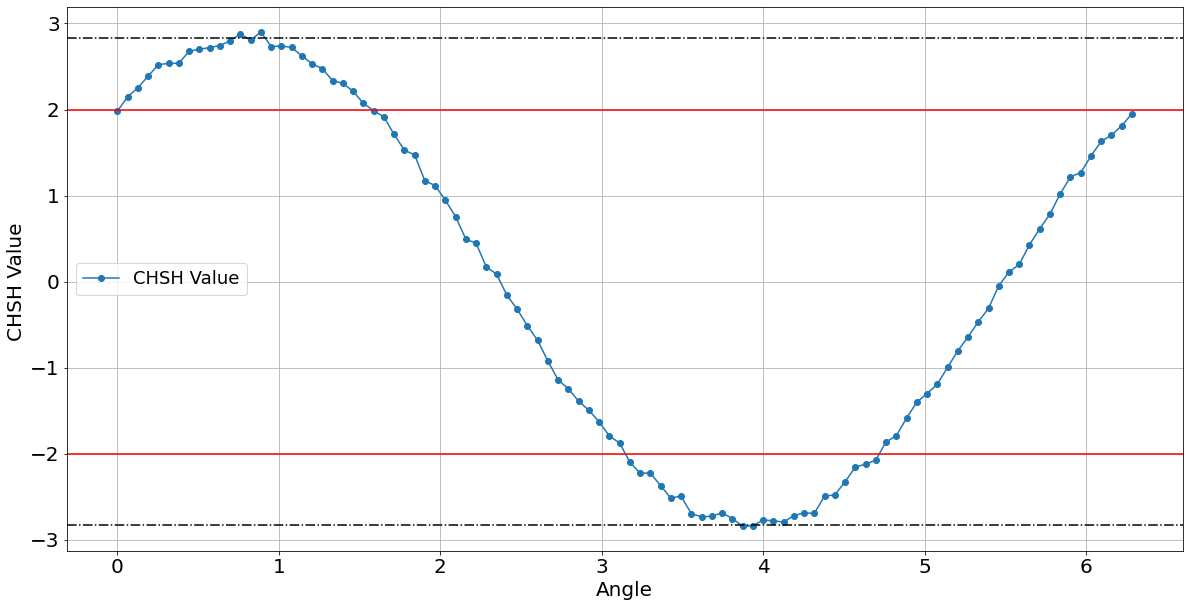

In [3]:
import matplotlib.pyplot as mplt
mplt.figure(figsize=(20,10))
mplt.rcParams.update({'font.size': 20})
mplt.plot(tv,CHSHValArr,'o-',label = 'CHSH Value')

mplt.grid(which='major',axis='both')
mplt.rcParams.update({'font.size': 18})
mplt.legend()
mplt.axhline(y=2, color='r', linestyle='-')
mplt.axhline(y=-2, color='r', linestyle='-')
mplt.axhline(y=np.sqrt(2)*2, color='k', linestyle='-.')
mplt.axhline(y=-np.sqrt(2)*2, color='k', linestyle='-.')
mplt.xlabel('Angle')
mplt.ylabel('CHSH Value ')

# Run on a QPU

To run CSHS inequality on a QPU, we replace the LocalSimulator with an AwsDevice. 
To reduce the cost, we run the the experiment only for the theta which gave Max CSHS inequality value.

The cost to run this experiment is \\$0.3 per task and \\$0.00035 per shot on the Oxford Quantum Circuits Lucy device. Since we have four circuits of 1000 shots each, that totals \\$2.60 USD.

In [5]:
from braket.aws import AwsDevice

device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
# Uncomment the right device to run on a QPU
#device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")
#device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")

tasks = submit_cshs_tasks(device,a=cshs_inequality_lhs_max_theta,a_=cshs_inequality_lhs_max_theta,b=0,b_=0)
cshs_value,cshs_inequality_lhs,results, E_ab, E_ab_,E_a_b,E_a_b_ = \
get_cshs_results(tasks)
if cshs_inequality_lhs>2:
    print("CSHS inequality violated:",cshs_inequality_lhs)
else:
    print("CSHS inequality not violated probably due to noise:",cshs_inequality_lhs)


a: 0.8885312555607496
a_: 0.8885312555607496
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(0.89)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(0.89)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(0.89)-H-
        |            
q1 : ---X------------

T  : |0|1|   2    |3|
circ_a_b_
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(0.89)-H-
        |            
q1 : ---X-H----------

T  : |0|1|   2    |3|
measurement_probabilities: [{'00': 0.428, '11': 0.397, '01': 0.076, '10': 0.099}, {'10': 0.449, '01': 0.432, '00': 0.064, '11': 0.055}, {'00': 0.431, '11': 0.461, '10': 0.056, '01': 0.052}, {'00': 0.426, '11': 0.395, '01': 0.091, '10': 0.088}]
prob_same: [0.825, 0.119, 0.892, 0.821]
prob_different: [0.175, 0.881, 0.108, 0.179]
cshs_value: 2.8379999999999996
E(a,b) = 0.6499999999999999,E(a,

We see that CSHS inequality is violated, so the device is demonstrating quantum behavior.

In [6]:
print(
    f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost() :.2f} USD"
)

Estimated cost to run this example: 0.02 USD


Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).